In [1]:
import os
import glob
import cv2
import collections
import ntpath
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#paths to folders to split
folder_with_combined_chro = "/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/extracted/individual/chromosome/to_split/ch_2"
folder_with_single_chro = "/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/extracted/individual/chromosome/to_split/ch_1"
#folder number for combined result folder 
#(make sure it is not same as an already existig folder to avoid overwriting the existing folder)
output_folder_tag = 2
main_path = "/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/extracted/individual/chromosome"
original_nuc_path = "/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc"

print(folder_with_combined_chro)
print(folder_with_single_chro)

/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/extracted/individual/chromosome/to_split/ch_2
/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/extracted/individual/chromosome/to_split/ch_1


In [5]:
def sort_list(lst):
  lst = sorted(lst, key = lambda fl : int(ntpath.basename(fl).split('.')[0]))
  return lst

In [6]:
#original imgs
nucleous=[]
for file in glob.glob(original_nuc_path + "/*.jpg"):
  nucleous.append(file)
nucleous = sort_list(nucleous)
print(len(nucleous))
print(nucleous)

921
['/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00729.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00730.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00731.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00732.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00733.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00734.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00735.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00736.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00737.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00738.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/nuclie01/nuc_01_729_1649/original_nuc/00739.jpg', '/data/FIBSEM/nuclie_align_ROI2_1700/n

In [7]:
combined = []
individual = []

for file in glob.glob(folder_with_combined_chro+"/*.jpg"):
    combined.append(file)

for file in glob.glob(folder_with_single_chro+"/*.jpg"):
    individual.append(file)

# print(len(combined))
# print(len(individual))
combined = sort_list(combined)
individual = sort_list(individual)

num_images = len(combined)
print(num_images)

org = Image.open(combined[0])
org.load()
org = np.array(org)
ip_shape = org.shape
print(ip_shape)

921
(1700, 1700)


In [8]:
# print(combined)

In [9]:
# print(individual)

[0]
921


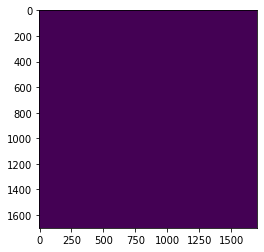

In [10]:
#splitting and saving on a new mask
final_imgs = []
for i in range(num_images):
    # print("i ",i)
    # print(len(final_imgs))
    # if(i==1):
    #   break
    x=np.zeros(ip_shape, np.uint8)
    im_comb = Image.open(combined[i])
    im_comb.load()
    im_comb = np.array(im_comb)
    im_comb[im_comb<40]=0
    
    im_ind = Image.open(individual[i])
    im_ind.load()
    im_ind = np.array(im_ind)
    im_ind[im_ind<40]=0
    
    x[im_comb!=0]=1
    x[im_ind!=0]=0

    final_imgs.append(x)

plt.imshow(x)
print(np.unique(x))
print(len(final_imgs))

In [11]:
#save folder after splitting
for k in range(num_images):
  # temp = (Label_Img[k]==label_chro)
  # temp = temp.astype(np.uint8)
  chro_temp = Image.open(nucleous[k])
  chro_temp.load()
  chro_temp = np.array(chro_temp)
  temp2= cv2.bitwise_and(chro_temp,chro_temp, mask = final_imgs[k])
  # temp2[temp2<40]=0
  # plt.imshow(temp2)
  # print(np.unique(temp2))
  # break
  tag=k
  path_tag = "ch_"+ str(output_folder_tag)
  complete_path = main_path + "/" + path_tag
  if not os.path.exists(complete_path):
    from pathlib import Path
    Path(complete_path).mkdir(parents=True, exist_ok=True)
  # cv2.imwrite(complete_path+"/"+ f"{tag:03d}"+".jpg", (temp2* 255).astype(np.uint8)) #####
  cv2.imwrite(complete_path+"/"+ f"{tag:03d}"+".jpg", (temp2))